In [ ]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.svm import SVC
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

In [ ]:
iris=load_iris()

In [ ]:
x = iris.data[:,:2]
y = iris.target

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)

In [ ]:
C=1
svc = svm.SVC(kernel='linear', C=C).fit(x_train, y_train)
poly_svc = svm.SVC(kernel='poly', degree=3, C=C).fit(x_train, y_train)
rbf_svc = svm.SVC(kernel='rbf', gamma=0.5, C=C).fit(x_train, y_train)
sigm_svc = svm.SVC(kernel='sigmoid', C=C).fit(x_train,y_train)

In [ ]:
#accuracy of linear
pred_lin = svc.predict(x_test)
acc_lin = accuracy_score(y_test, pred_lin)*100

#accuracy of polynomial
pred_poly = poly_svc.predict(x_test)
acc_poly = accuracy_score(y_test, pred_poly)*100

#accuracy of rbf
pred_rbf = rbf_svc.predict(x_test)
acc_rbf = accuracy_score(y_test, pred_rbf)*100

#accuracy of sigmoid
pred_sigm = sigm_svc.predict(x_test)
acc_sigm = accuracy_score(y_test, pred_sigm)*100

In [ ]:
data = {'linear':acc_lin, 'polynomial':acc_poly, 'rbf':acc_rbf, 'sigmoid':acc_sigm}
kernels = list(data.keys())
acc = list(data.values())
acc

[83.33333333333334, 86.66666666666667, 83.33333333333334, 23.333333333333332]

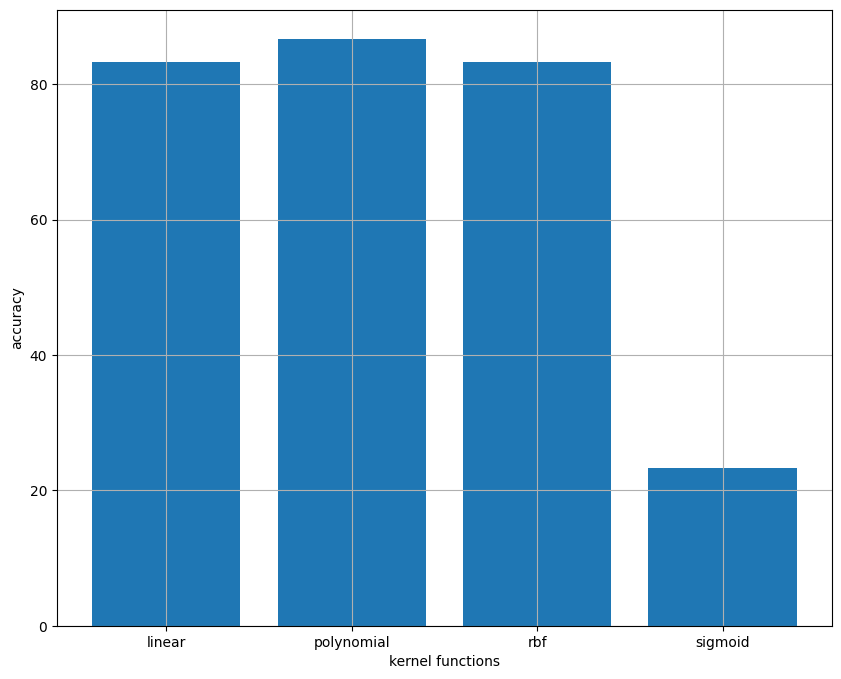

In [ ]:
plt.figure(figsize=(10,8))
plt.grid()
plt.bar(kernels, acc)
plt.xlabel('kernel functions')
plt.ylabel('accuracy');
#plotting accuracies

In [ ]:
rbf_svc_3 = svm.SVC(kernel='rbf', gamma=0.3, C=C).fit(x_train, y_train)
rbf_svc_5 = svm.SVC(kernel='rbf', gamma=0.5, C=C).fit(x_train, y_train)
rbf_svc_7 = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(x_train, y_train)
rbf_svc_9 = svm.SVC(kernel='rbf', gamma=0.9, C=C).fit(x_train, y_train)


In [ ]:
#0.3
rbf_svc_3 = svm.SVC(kernel='rbf', gamma=0.3, C=C).fit(x_train, y_train)
pred_rbf_3 = rbf_svc_3.predict(x_test)
acc_3 = accuracy_score(y_test, pred_rbf_3)

#0.5
rbf_svc_5 = svm.SVC(kernel='rbf', gamma=0.5, C=C).fit(x_train, y_train)
pred_rbf_5 = rbf_svc_5.predict(x_test)
acc_5 = accuracy_score(y_test, pred_rbf_5)

#0.7
rbf_svc_7 = svm.SVC(kernel='rbf', gamma=0.7, C=C).fit(x_train, y_train)
pred_rbf_7 = rbf_svc_7.predict(x_test)
acc_7 = accuracy_score(y_test, pred_rbf_7)

#0.9
rbf_svc_9 = svm.SVC(kernel='rbf', gamma=0.9, C=C).fit(x_train, y_train)
pred_rbf_9 = rbf_svc_9.predict(x_test)
acc_9 = accuracy_score(y_test, pred_rbf_9)
data1 = {0.3:acc_3, 0.5:acc_5, 0.7:acc_7, 0.9:acc_9}
acc1 = list(data1.values())
acc1

[0.8666666666666667,
 0.8333333333333334,
 0.7666666666666667,
 0.7666666666666667]

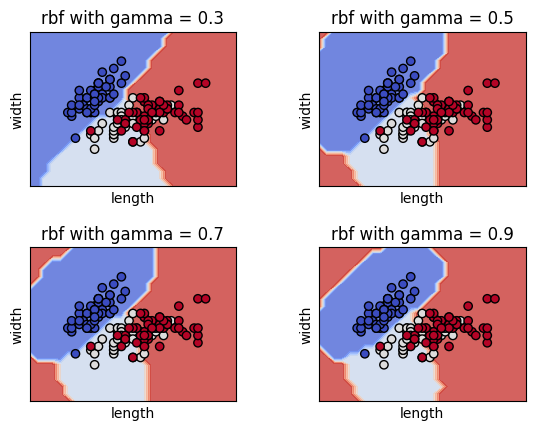

In [ ]:
h = 0.2
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
titles = ['rbf with gamma = 0.3','rbf with gamma = 0.5','rbf with gamma = 0.7','rbf with gamma = 0.9']
for i, clf in enumerate((rbf_svc_3, rbf_svc_5, rbf_svc_7, rbf_svc_9)):
    plt.subplot(2, 2, i + 1)
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolor='black')
    plt.xlabel('length')
    plt.ylabel('width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
plt.show()